In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
retail_data=pd.read_csv(r"C:\Users\saumy\Downloads\retail_sales_dataset.csv")
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [6]:
retail_data['Date']=pd.to_datetime(retail_data['Date'])

# Data Cleaning

### 1.Missing Values

In [12]:
retail_data.isnull().sum()  #There are no missing values present in the data.

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### 2.Duplicate Values

In [13]:
retail_data.duplicated().value_counts()

False    1000
Name: count, dtype: int64

### 3.Negative Values

In [18]:
(retail_data[['Age','Quantity','Price per Unit']]<0).any()

Age               False
Quantity          False
Price per Unit    False
dtype: bool

No negative values are present inside the data.

### 4. Outlier Values

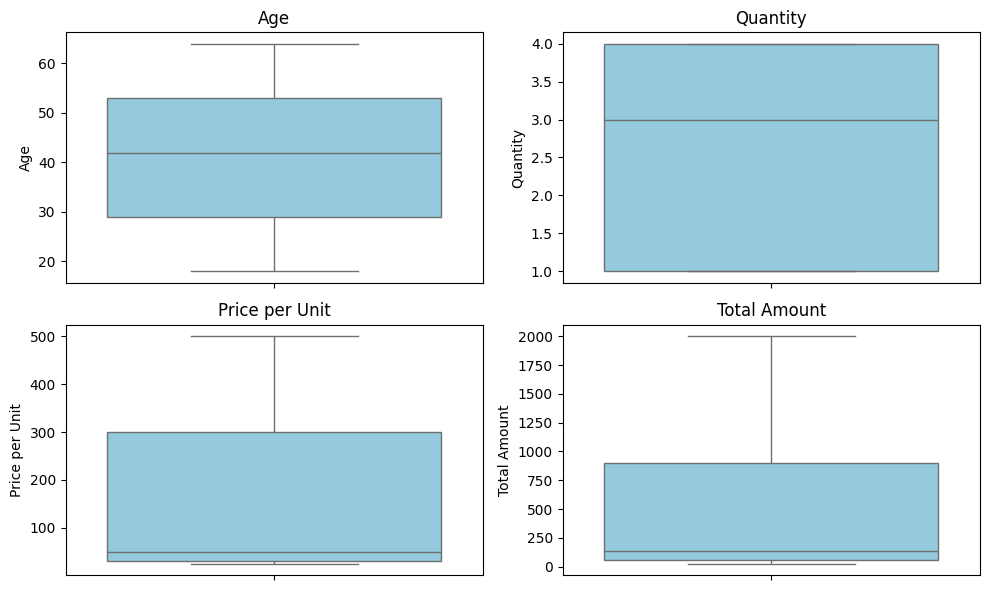

In [13]:
cols=['Age','Quantity','Price per Unit','Total Amount']
plt.figure(figsize=(10,6))

for i, col in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=retail_data[col],color='skyblue')
    plt.title(col)
    
plt.tight_layout()
plt.show()

All column fall well within the IQR bounds. No outliers are present in the data.

# KPI

In [15]:
min_date = retail_data['Date'].min()
max_date = retail_data['Date'].max()
print(f"Time Span : {min_date} to {max_date}")

unique_product_type = retail_data['Product Category'].unique()
print(unique_product_type)

Total_Sales = retail_data['Total Amount'].sum()
Total_transaction=retail_data.shape[0]
Avg_transaction= retail_data['Total Amount'].mean()
KPI1 = pd.DataFrame({
    'Financial Metric':['Total Sales','Total Transaction','Average Transaction'],
    'Value':[Total_Sales,Total_transaction,Avg_transaction]
})
KPI1

Time Span : 2023-01-01 00:00:00 to 2024-01-01 00:00:00
['Beauty' 'Clothing' 'Electronics']


,Financial Metric,Value
0,Total Sales,456000.0
1,Total Transaction,1000.0
2,Average Transaction,456.0


# Descriptive Statistics

In [30]:
retail_data[['Age','Quantity','Price per Unit','Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000
